In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/revenue_data.csv",parse_dates=["Month"],index_col=["Month"])
df.head()

,Sales
Month,
2015-01-01,27716
2015-02-01,25536
2015-03-01,28896
2015-04-01,33540
2015-05-01,40755


In [ ]:
#Checking for the data types of data from dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2015-01-01 to 2019-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


In [ ]:
#Checking if there are any null values are present in the dataset.

In [ ]:
df.isna().sum()

Sales    0
dtype: int64

In [ ]:
df.shape

(60, 1)

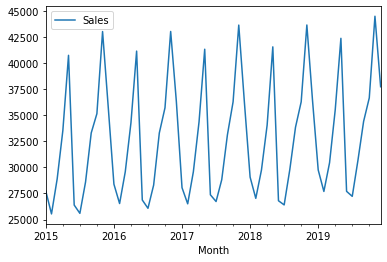

In [ ]:
df.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller
res = adfuller(df.Sales)
p_val=res[1]
if p_val > 0.05:
  print("Not Stationary")
else:
  print("Stationary")

Not Stationary


In [ ]:
x = df[["Sales"]]

In [ ]:
x.head()

,Sales
Month,
2015-01-01,27716
2015-02-01,25536
2015-03-01,28896
2015-04-01,33540
2015-05-01,40755


In [ ]:
train_len = int(len(x) * 0.8)

In [ ]:
train = x[:train_len]
test = x[train_len:]

In [ ]:
len(train)

48

In [ ]:
print(train.shape)
print(test.shape)

(48, 1)
(12, 1)


In [ ]:
from pmdarima import auto_arima

In [ ]:
auto_arima = auto_arima(train,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=947.035, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=968.228, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=964.061, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=961.147, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1136.989, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=956.660, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=967.716, Time=0.17 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=945.550, Time=0.43 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=947.770, Time=0.26 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=944.968, Time=0.38 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=947.885, Time=0.27 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=949.332, Time=0.43 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=953.337, Time=0.38 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=949.644,

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train,order=(4,0,2))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:                     ARMA(4, 2)   Log Likelihood                -458.036
Method:                       css-mle   S.D. of innovations           3098.745
Date:                Fri, 02 Jul 2021   AIC                            932.071
Time:                        10:58:30   BIC                            947.041
Sample:                    01-01-2015   HQIC                           937.728
                         - 12-01-2018                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.247e+04    371.972     87.280      0.000    3.17e+04    3.32e+04
ar.L1.Sales     0.7425      0.210      3.543      0.000       0.332       1.153
ar.L2.Sales    -0.9983      0.178     -5.600      0.000      -1.348      -0.649
ar.L3.Sales     0.0127      0.183      0.069      0.945      -0.346       0.372
ar.L4.Sales    -0.2601      0.234     -1.113      0.266      -0.718       0.198
ma.L1.Sales    -0.7672      0.183     -4.196      0.000      -1.126      -0.409
ma.L2.Sales     1.0000      0.079     12.680      0.000       0.845       1.155
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.5045           -0.8712j            1.0067           -0.1665
AR.2            0.5045           +0.8712j            1.0067            0.1665
AR.3           -0.4800           -1.8877j            1.9478           -0.2896
AR.4           -0.4800           +1.8877j            1.9478            0.2896
MA.1            0.3836           -0.9235j            1.0000           -0.1873
MA.2            0.3836           +0.9235j            1.0000            0.1873
-----------------------------------------------------------------------------
"""

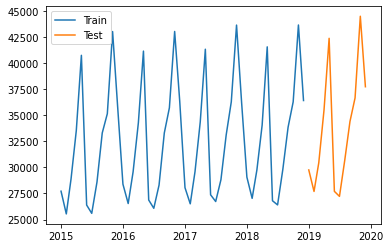

In [ ]:
plt.plot(train,label="Train")
plt.plot(test,label="Test")
plt.legend()

In [ ]:
start = len(train)
end = len(x) - 1
print(start,end)

48 59


In [ ]:
x.tail()

,Sales
Month,
2019-08-01,30668
2019-09-01,34410
2019-10-01,36670
2019-11-01,44505
2019-12-01,37740


In [ ]:
ypred_test = model_fit.predict(start=start,end=end)

In [ ]:
ypred_test.head()

2019-01-01    26202.490022
2019-02-01    25945.225591
2019-03-01    31014.911325
2019-04-01    36790.770871
2019-05-01    38671.295804
Freq: MS, dtype: float64

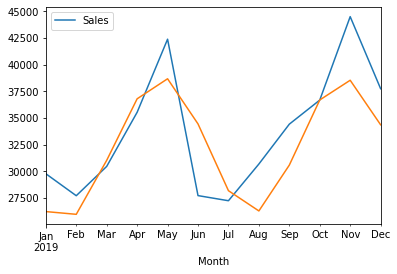

In [ ]:
test.plot()
ypred_test.plot()

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
MSE = mean_squared_error(test,ypred_test)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(test,ypred_test)

In [ ]:
print("MSE :",MSE)
print("RMSE :",RMSE)
print("MAE :",MAE)

MSE : 13245958.740993947
RMSE : 3639.499792690466
MAE : 3012.474017148725


In [ ]:
ypred_test

2019-01-01    26202.490022
2019-02-01    25945.225591
2019-03-01    31014.911325
2019-04-01    36790.770871
2019-05-01    38671.295804
2019-06-01    34432.970544
2019-07-01    28163.839924
2019-08-01    26262.075284
2019-09-01    30565.515761
2019-10-01    36681.716838
2019-11-01    38532.933818
2019-12-01    34350.985017
Freq: MS, dtype: float64

#Function to Predict the Sales

In [ ]:
date = input("Enter the date : ")
start = "2019-01-01"
ypred_test = model_fit.predict(start=start,end=date)
print(ypred_test)

Enter the date : 2019-12-01
2019-01-01    26202.490022
2019-02-01    25945.225591
2019-03-01    31014.911325
2019-04-01    36790.770871
2019-05-01    38671.295804
2019-06-01    34432.970544
2019-07-01    28163.839924
2019-08-01    26262.075284
2019-09-01    30565.515761
2019-10-01    36681.716838
2019-11-01    38532.933818
2019-12-01    34350.985017
Freq: MS, dtype: float64
